<a href="https://colab.research.google.com/github/pseeej/SmartSystemsSoftware/blob/master/BigdataAnalysisInBiz/4%EC%A3%BC%EC%B0%A8%EB%85%B9%ED%99%94%EA%B0%95%EC%9D%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#실습환경 셋업

1) sqlite 업그레이드

In [ ]:
!apt-get update
!apt-get upgrade sqlite3

In [2]:
!curl https://www.sqlite.org/src/tarball/sqlite.tar.gz?r=release | tar xz
%cd sqlite/
!./configure
!make sqlite3.c
%cd /content
!npx degit coleifer/pysqlite3 -f
!cp sqlite/sqlite3.[ch] .
!python setup.py build_static build
!cp build/lib.linux-x86_64-3.7/pysqlite3/_sqlite3.cpython-37m-x86_64-linux-gnu.so \
     /usr/lib/python3.7/lib-dynload/


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.9M  100 10.9M    0     0  9812k      0  0:00:01  0:00:01 --:--:-- 9812k
/content/sqlite
checking build system type... x86_64-pc-linux-gnu
checking host system type... x86_64-pc-linux-gnu
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for a sed that does not truncate output... /bin/sed
checking for grep that handles long lines and -e... /bin/grep
checking for egrep... /bin/grep -E
checking for fgrep... /bin/grep -F
checking for ld used by gcc... /usr/bin/ld
checkin

In [1]:
# 메뉴 런타임 > 런타임 다시 시작 후 살행
import pandas as pd
import sqlite3
sqlite3.sqlite_version  # 3.36.0

'3.36.0'

2) 데이터베이스 다운로드

In [2]:
import gdown

url = 'https://drive.google.com/uc?id=1iTVsBZLU8GtqSIy0iZ1A4Wp4ZZMuNoUM'
output = 'classicmodels.db'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1iTVsBZLU8GtqSIy0iZ1A4Wp4ZZMuNoUM
To: /content/classicmodels.db
100%|██████████| 311k/311k [00:00<00:00, 19.0MB/s]


'classicmodels.db'

3) 데이터베이스 연결

In [3]:
conn = sqlite3.connect("classicmodels.db")
cur = conn.cursor()

4) 데이터베이스 테이블 조회

In [4]:
def viewlimit(table, cutlimit):
  sql = "SELECT * FROM " + table + " LIMIT " + cutlimit + ";"
  cur.execute(sql)  # 입력한 내용을 sql에서 실행시키기 위한 line
  rows = cur.fetchall() # cur로 들어간 내용 가져오기(명령문 가져오기)
  print(sql)
  for row in rows:
    print(row)

In [5]:
# customers 안의 10개의 data를 조회하겠다.
viewlimit("customers","10")

SELECT * FROM customers LIMIT 10;
(103, 'Atelier graphique', 'Schmitt', 'Carine ', '40.32.2555', '54, rue Royale', None, 'Nantes', None, '44000', 'France', 1370, 21000)
(112, 'Signal Gift Stores', 'King', 'Jean', '7025551838', '8489 Strong St.', None, 'Las Vegas', 'NV', '83030', 'USA', 1166, 71800)
(114, 'Australian Collectors, Co.', 'Ferguson', 'Peter', '03 9520 4555', '636 St Kilda Road', 'Level 3', 'Melbourne', 'Victoria', '3004', 'Australia', 1611, 117300)
(119, 'La Rochelle Gifts', 'Labrune', 'Janine ', '40.67.8555', '67, rue des Cinquante Otages', None, 'Nantes', None, '44000', 'France', 1370, 118200)
(121, 'Baane Mini Imports', 'Bergulfsen', 'Jonas ', '07-98 9555', 'Erling Skakkes gate 78', None, 'Stavern', None, '4110', 'Norway', 1504, 81700)
(124, 'Mini Gifts Distributors Ltd.', 'Nelson', 'Susan', '4155551450', '5677 Strong St.', None, 'San Rafael', 'CA', '97562', 'USA', 1165, 210500)
(125, 'Havel & Zbyszek Co', 'Piestrzeniewicz', 'Zbyszek ', '(26) 642-7555', 'ul. Filtrowa 68'

5) Pandas 변환 후 결과 확인

In [11]:
window_sql = f"""
select *
  from customers
 limit 100
""" # sql에서는 여기까지만 입력하면 되는데
df = pd.read_sql(window_sql, conn, index_col=None)  # python에서 실행시키기 위해 여기 아래의 줄도 사용. index_col은 기준이 되는 column 지정
df.head(10) # 위에서부터 몇 개까지만 노출을 시킬 것인가.

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700
5,124,Mini Gifts Distributors Ltd.,Nelson,Susan,4155551450,5677 Strong St.,None,San Rafael,CA,97562,USA,1165.0,210500
6,125,Havel & Zbyszek Co,Piestrzeniewicz,Zbyszek,(26) 642-7555,ul. Filtrowa 68,None,Warszawa,None,01-012,Poland,NaN,0
7,128,"Blauer See Auto, Co.",Keitel,Roland,+49 69 66 90 2555,Lyonerstr. 34,None,Frankfurt,None,60528,Germany,1504.0,59700
8,129,Mini Wheels Co.,Murphy,Julie,6505555787,5557 North Pendale Street,None,San Francisco,CA,94217,USA,1165.0,64600
9,131,Land of Toys Inc.,Lee,Kwai,2125557818,897 Long Airport Avenue,None,NYC,NY,10022,USA,1323.0,114900


In [12]:
#데이터 다운로드
df.to_csv('/content/tmp.csv')   # 위의 내용 csv file로 다운받기 가능

데이터베이스 소개 URL
https://www.mysqltutorial.org/mysql-sample-database.aspx

**데이터베이스 소개**

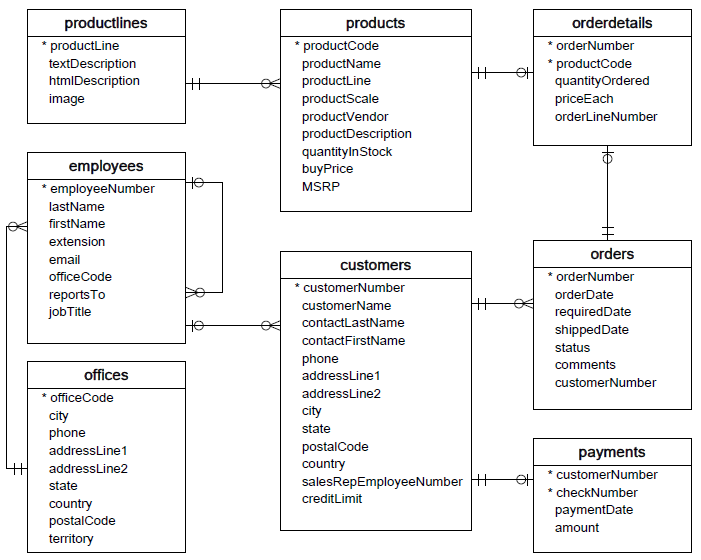


*   Customers: stores customer’s data.
*   Products: stores a list of scale model cars.
*   ProductLines: stores a list of product line categories.
*   Orders: stores sales orders placed by customers.
*   OrderDetails: stores sales order line items for each sales order.
*   Payments: stores payments made by customers based on their accounts.
*   Employees: stores all employee information as well as the organization structure such as who reports to whom.
*   Offices: stores sales office data.




# 1.SQL 문법

SELECT 칼럼, 계산값 <br>
FROM 테이블 명 <br>
WHERE 조건 <br>
GROUP BY 그룹화 <br>
HAVING 그룹화에 사용되는 조건

#2.SELECT

"박 대리님, 의류 상품 번호 좀 조회해 주시겠어요?"

SELECT 상품 번호 <BR>
  FROM DB명.PRODUCT;


<center>
상품테이블 (PRODUCT)

|상품 번호|판매 국가|재고|판매 금액|색상|카테고리|
|-----|-----|-----|-----|-----|-----|
|a001|미국|100|1000|흰색|신발|
|a002|한국|30|700|검은색|바지|
|a003|일본|40|770|검은색|바지|
</center>

**1) 칼럼 조회**

SELECT 호출하려는 칼럼 <br>
FROM DB 명.테이블 명;

In [13]:
#classicmodels.customers의 customerNumber를 조회하세요.
sql = f"""select customerNumber from customers;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,customerNumber
0,103
1,112
2,114
3,119
4,121
5,124
6,125
7,128
8,129
9,131


"박 대리님, 전달해 주신 상품 번호는 잘 받았습니다. 상품 개수도 전달 가능할까요?"

SELECT count(상품 번호) <BR>
  FROM DB명.PRODUCT;

**2) 집계 함수 count, sum, avg**

SELECT 집계 함수 <br>
FROM DB 명.테이블 명;

In [14]:
#classicmodels.payments의 amount의 총합과 checknumber 개수를 구하세요.
sql = f"""select sum(amount), count(checknumber) from payments;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,sum(amount),count(checknumber)
0,8853839.23,273


**3) * (모든 결과 조회)**
<br> 해당 테이블의 모든 칼럼을 출력하고 싶을 때 사용

SELECT * <br>
FROM DB 명.테이블 명;

In [15]:
#classicmodels.products의 모든 컬럼을 조회하세요.
sql = f"""select * from products;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddl...",6625,68.99,118.94
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,91.02,193.66
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00
5,S10_4962,1962 LanciaA Delta 16V,Classic Cars,1:10,Second Gear Diecast,Features include: Turnable front wheels; steer...,6791,103.42,147.74
6,S12_1099,1968 Ford Mustang,Classic Cars,1:12,Autoart Studio Design,"Hood, doors and trunk all open to reveal highl...",68,95.34,194.57
7,S12_1108,2001 Ferrari Enzo,Classic Cars,1:12,Second Gear Diecast,Turnable front wheels; steering function; deta...,3619,95.59,207.80
8,S12_1666,1958 Setra Bus,Trucks and Buses,1:12,Welly Diecast Productions,"Model features 30 windows, skylights & glare r...",1579,77.90,136.67
9,S12_2823,2002 Suzuki XREO,Motorcycles,1:12,Unimax Art Galleries,"Official logos and insignias, saddle bags loca...",9997,66.27,150.62


**4) AS**
<br> 특정 칼럼의 칼럼 명을 변경해 조회할 때 사용

SELECT 칼럼 명 as 변경 칼럼 명 <br>
FROM DB 명.테이블 명;

In [16]:
#classicmodels.products의 productCode의 개수를 구하고,
#컬럼 명을 n_products로 변경하세요.
sql = f"""select count(productCode) as n_products from products;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,n_products
0,110


**5) DISTINCT**
<br> 중복을 제외하고 데이터를 조회할 때 사용

SELECT DISTINCT 제조 국가 <br>
FROM DB 명.상품 테이블;

<center>
자동차 제조사, 제조 국가 정보

|자동차ID|제조사명|제조국가|
|-----|-----|-----|
|A|벤츠|독일|
|B|벤츠|독일|
|C|BMW|독일|
|D|현대|한국|

제조 국가 조회 결과

|제조국가|
|-----|
|독일|
|한국|
</center>


In [17]:
#classicmodels.orderdetails의 ordernumber의 중복을 제거하고 조회하세요.
sql = f"""select distinct orderNumber from orderdetails;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,orderNumber
0,10100
1,10101
2,10102
3,10103
4,10104
5,10105
6,10106
7,10107
8,10108
9,10109


#3.FROM

SELECT 계산식 또는 칼럼 명 <br>
FROM DB 명.SALES;

#4.WHERE

"박 대리님, 현재 미국에서 판매되는 상품의 상품 번호 전달 부탁드립니다."

SELECT 상품 번호 <BR>
  FROM DB명.PRODUCT <BR>
 WHERE 판매국가 = '미국';

**1) BETWEEN**
<br> 특정 칼럼의 값이 시작점 ~ 끝점인 데이터만 출력할 수 있는 조건을 생성할 때 사용

SELECT * <br>
FROM DB 명.테이블 명 <br>
WHERE 칼럼 BETWEEN 시작점 AND 끝점;

"박 대리님, 전달 주신 상품 번호 잘 받았습니다.
<br>그런데 클라이언트에서 2010~2014년에 출시된 상품 번호도 필요하다고 합니다. <br>전달 가능할까요?"

SELECT 상품 번호
<br>FROM DB 명.PRODUCT
<br>WHERE 출시 연도 BETWEEN 2010 AND 2014;

In [18]:
#classicmodels.orderdetails의 priceEach가 30에서 50사이인 데이터를 조회하세요.
sql = f"""select * from orderdetails where priceEach between 30 and 50;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
0,10100,S24_3969,49,35.29,1
1,10101,S24_1937,45,32.53,3
2,10101,S24_2022,46,44.35,2
3,10102,S18_1367,41,43.13,1
4,10103,S18_4668,41,40.75,9
5,10104,S24_2840,44,30.41,10
6,10105,S72_3212,25,44.77,8
7,10106,S50_1341,39,35.78,6
8,10106,S72_1253,48,43.70,15
9,10108,S32_2206,27,36.21,13


**2) 대소 관계 표현**
<br> 특정 칼럼의 대소 관계를 이용해 출력할 수 있는 조건을 생성할 때 사용

<center>
자동차 제조사, 제조 국가 정보

|연산자|설명|
|-----|-----|
|=|동일하다|
|>|초과|
|>=|이상|
|<|미만|
|<=|이하|
|<>|같지 않다|

</center>

"박 대리님 이번에는 2010년 이전 출시 상품과 2014년 이후 상품 번호 좀 출력해 주시겠어요?

SELECT 상품번호 <br>
FROM DB 명.PRODUCT <br>
WHERE 출시 연도 < 2010;

SELECT 상품번호 <br>
FROM DB 명.PRODUCT <br>
WHERE 출시 연도 > 2014;

In [19]:
#classicmodels.orderdetails의 priceEach가 30 이상인 데이터를 조회하세요.
sql = f"""select * from orderdetails where priceEach >= 30 ;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
0,10100,S18_1749,30,136.00,3
1,10100,S18_2248,50,55.09,2
2,10100,S18_4409,22,75.46,4
3,10100,S24_3969,49,35.29,1
4,10101,S18_2325,25,108.06,4
5,10101,S18_2795,26,167.06,1
6,10101,S24_1937,45,32.53,3
7,10101,S24_2022,46,44.35,2
8,10102,S18_1342,39,95.55,2
9,10102,S18_1367,41,43.13,1


**3) IN**

특정 값들을 포함한 결과를 출력하고 싶을 때 사용

"박 대리님, 미국과 영국에서 출시된 상품 번호 전달 부탁드립니다."

SELECT 상품 번호
<br>FROM DB 명.PRODUCT
<br>WHERE 판매 국가 IN ('미국', '영국');

In [22]:
#classicmodels.customers의 country가 USA 또는 Canada인 cutomernumber를 조회하세요.
sql = f"""select customerNumber,country from customers where country in ('USA','Canada') ;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,customerNumber,country
0,112,USA
1,124,USA
2,129,USA
3,131,USA
4,151,USA
5,157,USA
6,161,USA
7,168,USA
8,173,USA
9,175,USA


**4) NOT IN**

특정 값들을 포함한 결과를 출력하고 싶을 때 사용

"박 대리님, 미국과 영국에서 출시되지 않은 상품 번호 전달 부탁드립니다."

SELECT 상품 번호
<br>FROM DB 명.PRODUCT
<br>WHERE 판매 국가 NOT IN ('미국', '영국');

In [23]:
#classicmodels.customers의 country가 USA, Canada가 아닌 cutomernumber를 조회하세요.
sql = f"""select customernumber,country from customers where country not in ('USA','Canada') ;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,customerNumber,country
0,103,France
1,114,Australia
2,119,France
3,121,Norway
4,125,Poland
5,128,Germany
6,141,Spain
7,144,Sweden
8,145,Denmark
9,146,France


**5) IS NULL**
<br>특정 값이 비어 있는(NULL) 데이터를 출력하고 싶을 때 사용

a002의 재고는 NULL인데, 이는 재고 값이 비어 있다는 의미
<br>재고값이 0이라는 의미가 아닌 값 자체가 비어 있는 의미

<center>
상품테이블 (PRODUCT)

|상품 번호|판매 국가|재고|판매 금액|색상|카테고리|
|-----|-----|-----|-----|-----|-----|
|a001|미국|100|1000|흰색|신발|
|a002|한국|NULL|700|검은색|바지|
|a003|일본|40|770|검은색|바지|
</center>



*특정 컬럼이 NULL인 데이터 출력*

SELECT 칼럼 명 또는 계산식
<br>FROM 테이블 명
<br>WHERE 칼럼 IS NULL

*특정 컬럼이 NULL이 아닌 데이터 출력*

SELECT 칼럼 명 또는 계산식
<br>FROM 테이블 명
<br>WHERE 칼럼 IS NOT NULL

In [24]:
#classicmodels.employees의 reportsTo의 값이 NULL인 employeeNumber를 조회하세요.
sql = f"""select employeeNumber from employees where reportsTo is NULL ;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,employeeNumber
0,1002


**6) LIKE '%TEXT%'**

특정 필드에 어떤 텍스트가 포함 되는 경우를 출력할 때 사용

"박 대리님, 주거지가 부산인 고객 정보를 출력해 주세요"

SELECT *
<br>FROM DB 명. CUSTOMERS
<br>WHERE 주소 LIKE '%부산%';

<center>
고객 정보

|고객ID|고객명|주소|
|-----|-----|-----|
|1|A|서울특별시 강남구|
|2|B|대전광역시 중구|
|3|C|부산광역시 만덕구|
|4|D|경기도 수원시 영통구|

In [25]:
#classicmodels.customers의 addressline1에 ST가 포함된 addressline1을 출력하세요.
sql = f"""select addressline1 from customers where addressline1 like '%ST%' ;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,addressLine1
0,8489 Strong St.
1,636 St Kilda Road
2,5677 Strong St.
3,Lyonerstr. 34
4,5557 North Pendale Street
5,7586 Pompton St.
6,Brehmen St. 121
7,Estrada da saúde n. 58
8,2678 Kingston Rd.
9,16780 Pompton St.


#5.GROUP BY

**특정 컬럼별 계산된 결과를 구할 때 사용**

자주 사용하는 3가지 집계 함수

<center>
집계 함수

|함수|의미|
|-----|-----|
|AVG()|평균|
|COUNT()|데이터 수 구하기|
|SUM()|합계|

</center>

**제조 국가별 자동차 평균 가격을 구할 때**

SELECT 제조 국가, AVG(가격)
<br>FROM DB 명.cars
<br>GROUP BY 제조 국가;

**제조 국가별, 제조사별 자동차 평균 가격을 구할 때**

SELECT 제조 국가, 제조사명, AVG(가격)
<br>FROM DB 명.cars
<br>GROUP BY 제조 국가, 제조사명;



<center>
자동차 정보 (cars)

|자동차ID|제조사명|제조국가|가격|
|-----|-----|-----|-----|
|A|벤츠|독일|2000|
|B|벤츠|독일|2500|
|C|BMW|독일|3000|
|D|현대|한국|1500|

</center>

In [27]:
#classicmodels.customers 테이블을 이용해 국가, 도시별 고객 수를 구하세요.
sql = f"""select country, city, count(customernumber) as n_customers
from customers group by country, city ;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,country,city,n_customers
0,Australia,Chatswood,1
1,Australia,Glen Waverly,1
2,Australia,Melbourne,1
3,Australia,North Sydney,1
4,Australia,South Brisbane,1
5,Austria,Graz,1
6,Austria,Salzburg,1
7,Belgium,Bruxelles,1
8,Belgium,Charleroi,1
9,Canada,Montréal,1


**CASE WHEN 구문을 사용하여 필요한 조건만 집계할 때**

다음과 같은 국가 정보가 있다고 할 때, 한국만 COUNT하는 방법

SELECT SUM(CASE WHEN 국가 = '한국' TEHN 1 ELSE 0 END) KOREA_CNT
<br>FROM TABLE;

<center>
국가 정보

|국가|
|-----|
|미국|
|한국|
|중국|
|영국|
|미국|
|한국|
|러시아|

</center>


In [29]:
#classicmodels.customers 테이블을 이용해 USA 거주자의 수를 계산하고, 그 비중을 구하세요.
# 맞으면 1로 변환, 아니면 0으로 변환하여 계산
# end로 query문 종료
sql = f"""
select sum(case when country = 'USA' then 1.00 else 0.00 end) as n_usa 
     , sum(case when country = 'USA' then 1.00 else 0.00 end) / count(*) as usa_portion
  from customers
;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,n_usa,usa_portion
0,36.0,0.295082


#6.JOIN

**1) LEFT JOIN(LEFT OUTER JOIN)**

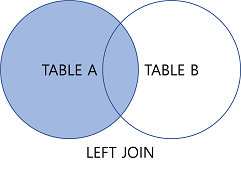


SELECT Orders.주문 번호
<br>, Orders.고객 ID
<br>, Orders.매출액
<br>, Customers.성명
<br>, Customers.성별
<br>FROM orders
<br>LEFT JOIN customer
<br>ON orders.고객 ID = customer.고객 ID


<center>
주문 테이블(Orders)

|주문 번호|고객ID|매출액|
|-----|-----|-----|
|A|X|100|
|B|Y|200|

고객 정보 테이블(Customer)

|고객ID|성명|성별|
|-----|-----|-----|
|X|손흥민|M|
|Z|김연아|F|

LEFT JOIN 결과

|주문 번호|고객ID|매출액|성명|성별|
|-----|-----|-----|-----|-----|
|A|X|100|손흥민|M|
|B|Y|200|NULL|NULL|

</center>


In [31]:
#classicmodels.customers, classicmodels.orders 테이블을 결합하고
#ORDERNUMBER와 COUNTRY를 출력하세요. (LEFT JOIN)
# on~으로 customernumber를 기준으로 하겠다. 없으면 그냥 NULL처리.
sql = f"""
select a.ordernumber
     , b.country
  from orders a
  left join customers b
    on a.customernumber = b.customernumber
;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,orderNumber,country
0,10100,USA
1,10101,Germany
2,10102,USA
3,10103,Norway
4,10104,Spain
5,10105,Denmark
6,10106,Italy
7,10107,USA
8,10108,Philippines
9,10109,USA


**2) INNER JOIN**

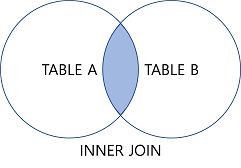


SELECT Orders.주문 번호
<br>, Orders.고객 ID
<br>, Orders.매출액
<br>, Customers.성명
<br>, Customers.성별
<br>FROM orders
<br>INNER JOIN customer
<br>ON orders.고객 ID = customer.고객 ID


<center>
주문 테이블(Orders)

|주문 번호|고객ID|매출액|
|-----|-----|-----|
|A|X|100|
|B|Y|200|

고객 정보 테이블(Customer)

|고객ID|성명|성별|
|-----|-----|-----|
|X|손흥민|M|
|Z|김연아|F|

INNER JOIN 결과

|주문 번호|고객ID|매출액|성명|성별|
|-----|-----|-----|-----|-----|
|A|X|100|손흥민|M|

</center>

In [32]:
#classicmodels.customers, classicmodels.orders 테이블을 결합하고
#ORDERNUMBER와 COUNTRY를 출력하세요. (INNER JOIN)
# 교집합이라고 생각하면 됨
sql = f"""
select a.ordernumber
     , b.country
  from orders a
 inner join customers b
    on a.customernumber = b.customernumber
;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,orderNumber,country
0,10100,USA
1,10101,Germany
2,10102,USA
3,10103,Norway
4,10104,Spain
5,10105,Denmark
6,10106,Italy
7,10107,USA
8,10108,Philippines
9,10109,USA


**3) FULL JOIN**

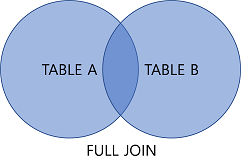


SELECT Orders.주문 번호
<br>, Orders.고객 ID
<br>, Orders.매출액
<br>, Customers.성명
<br>, Customers.성별
<br>FROM orders
<br>FULL JOIN customer
<br>ON orders.고객 ID = customer.고객 ID


<center>
주문 테이블(Orders)

|주문 번호|고객ID|매출액|
|-----|-----|-----|
|A|X|100|
|B|Y|200|

고객 정보 테이블(Customer)

|고객ID|성명|성별|
|-----|-----|-----|
|X|손흥민|M|
|Z|김연아|F|

FULL JOIN 결과

|주문 번호|고객ID|매출액|성명|성별|
|-----|-----|-----|-----|-----|
|A|X|100|손흥민|M|
|B|Y|200|NULL|NULL|
|NULL|NULL|NULL|김연아|F|


</center>

# 7.CASE WHEN

**CASE WHEN 구문은 조건에 따른 값을 다르게 출력하고 싶을 때 사용**

SELECT CASE WHEN 조건1 THEN 결과 1
<br> WHEN 조건2 THEM 결과 2
<br> ELSE 결과3 END
<br> FROM DB 명.테이블 명

조건1을 만족하는 경우 결과 1을 출력하게 되고,
<br>조건 2를 만족하는 경우 결과 2를 출력하고,
<br>조건1, 조건2를 모두 만족하지 않는 경우 결과 3을 출력함


"박 대리님, 고객 정보 테이블에서 고객명과 고객의 연령대(10세 단위)를 출력 부탁드려도 될까요?"

SELECT CASE WHEN 연령 BETWEEN 20 AND 29 THEN '20대'
<br>WHEN 연령 BETWEEN 40 AND 49 THEN '40대'
<br>WHEN 연령 BETWEEN 50 AND 59 THEN '50대'
<br>FROM DB 명.customer;


<center>
고객 정보 테이블(Customer)

|고객ID|고객명|연령|
|-----|-----|-----|
|A|JHON|28|
|B|LINA|58|
|C|GREG|48|

</center>

In [33]:
#classicmodels.customers의 country칼럼을 이용해 북미(Canada, USA),
#비북미를 출력하는 칼럼을 생성하세요. (비북미는 OTHERS로 출력)
sql = f"""
select country
     , case when country in ('USA', 'Canada') then 'North America'
            else 'OTHERS' end as region
  from customers
;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,country,region
0,France,OTHERS
1,USA,North America
2,Australia,OTHERS
3,France,OTHERS
4,Norway,OTHERS
5,USA,North America
6,Poland,OTHERS
7,Germany,OTHERS
8,USA,North America
9,USA,North America


In [34]:
#classicmodels.customers의 country칼럼을 이용해 북미(Canada, USA),
#비북미를 출력하는 칼럼을 생성하고, 북미, 비북미 거주 고객의 수를 계산하세요.
# 여러 개 나열할 때는 , 를 사용하는듯.
sql = f"""
select case when country in ('USA', 'Canada') then 'North America' 
            else 'OTHERS' end as region
     , count(customernumber) as n_customers
  from customers
 group by case when country in ('USA', 'Canada') then 'North America'
               else 'OTHERS' end
;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,region,n_customers
0,North America,39
1,OTHERS,83


In [36]:
#classicmodels.customers의 country칼럼을 이용해 북미(Canada, USA),
#비북미를 출력하는 칼럼을 생성하고, 북미, 비북미 거주 고객의 수를 계산하세요.
# group by 1은 첫 번째 열로 그룹화해라 의 의미... 한 번 더 입력하기 번거로워서...
# 위랑 똑같은 결과임. 첫 번째 line에 작성한 코드가 그대로 들어감.
sql = f"""
select case when country in ('USA', 'Canada') then 'North America'
            else 'OTHERS' end as region
     , count(customernumber) as n_customers
  from customers
 group by 1
;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,region,n_customers
0,North America,39
1,OTHERS,83


#8.RANK, ROW_NUMBER

**데이터에 순위를 매길 때 사용**

두 함수의 차이점은 동점일 때 처리 방법
<br>ROW_NUMBER()는 동점인 경우도 서로 다른 등수로 계산
<br>RANK()는 동인 경우 같은 등수로 계산

<center>
고객을 구매 금액으로 순위를 매길 때

|고객번호|구매 금액|RANK|ROW_NUMBER|
|-----|-----|-----|-----|
|A|1000|4|4|
|B|400|2|2|
|D|200|1|1|
|D|200|2|3|

</center>

**구매금액을 기준으로 순위를 매기고 싶을 때**
<br>SELECT ROW_NUMBER() OVER (ORDER BY column) FROM...
<br>SELECT RANK() OVER (ORDER BY column) FROM...

SELECT ROW_NUMBER() OVER (ORDER BY 구매금액) as ROW_NUMBER
<br>, RANK() OVER (ORDER BY 구매금액) as RANK
<br>FROM TABLE

**고객 번호 내에서 순위를 매기고 싶을 때**
<br>SELECT ROW_NUMBER() OVER (PARTITION BY column ORDER BY column) FROM...
<br>SELECT RANK() OVER (PARTITION BY column ORDER BY column) FROM...

SELECT ROW_NUMBER() OVER (PARTITION BY 고객 번호 ORDER BY 구매금액) as ROW_NUMBER
<br>, RANK() OVER (PARTITION BY 고객 번호 ORDER BY 구매금액) as RANK
<br>FROM TABLE

In [37]:
#classicmodels.products 테이블에서 buyprice 칼럼으로 순위를 매겨 주세요.
#(오름차순)(row_number, rank, dense_rank 사용)
# row_number는 동점인 경우도 서로 다른 등수, rank는 같은 등수로.
# over안에는 정렬할 기준.
sql = f"""
select buyprice
     , row_number() over (order by buyprice) rownumber
     , rank() over (order by buyprice) rnk
  from products
;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)
#22번, 23번 동일 가격

,buyPrice,rownumber,rnk
0,15.91,1,1
1,16.24,2,2
2,20.61,3,3
3,21.75,4,4
4,22.57,5,5
5,23.14,6,6
6,24.14,7,7
7,24.23,8,8
8,24.26,9,9
9,24.92,10,10


In [39]:
#classicmodels.products 테이블의 productline별로 순위를 매겨 주세요.
#(buyprice칼럼 기준, 오름차순)(row_number, rank 사용)
# partition by를 사용함으로써,,, 특정 범위 안에서의 등수 구함.
# parition by productline면 productline 내의 category마다 등수가 1등부터 n등까지 저장되는 것...
sql = f"""
select productline
     , buyprice
     , row_number() over (partition by productline order by buyprice) rownumber
     , rank() over (partition by productline order by buyprice) rnk
  from products
 where productline <> 'Classic Cars'
;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(30)

,productLine,buyPrice,rownumber,rnk
0,Motorcycles,24.14,1,1
1,Motorcycles,24.23,2,2
2,Motorcycles,32.95,3,3
3,Motorcycles,34.17,4,4
4,Motorcycles,37.32,5,5
5,Motorcycles,47.10,6,6
6,Motorcycles,48.81,7,7
7,Motorcycles,56.13,8,8
8,Motorcycles,60.86,9,9
9,Motorcycles,66.27,10,10


# 9.SUBQUERY

"박 대리님, NYC(Newyork)에 거주하는 고객들의 주문 번호를 조회해 주세요"

In [ ]:
#classicmodels.customers와 classicmodels.orders를 이용해 USA 거주자의 주문 번호를 출력하세요.
# orders의 customernumber에서 미국에 사는 사람들의 주문번호만을 가져오기...
# where customernumber in으로! customernumber를 기준으로 있는 것만 조회를 함...
sql = f"""
select ordernumber
  from orders
 where customernumber in (select customernumber
  from customers
 where country = 'USA')
;"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,orderNumber
0,10100
1,10102
2,10107
3,10109
4,10111
5,10113
6,10115
7,10124
8,10127
9,10130


# 10.Finish